In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

In [11]:
data = pd.read_csv("winequality-white.csv")
x=data.drop('quality',axis=1)
y=data['quality']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=100)


y_pred:  [6 5 6 ... 5 5 7]
y_test:  [7 5 6 ... 5 4 8]
y_test:  828     7
1621    5
3091    6
2010    6
1433    6
       ..
2285    5
1936    6
2282    5
259     4
723     8
Name: quality, Length: 1225, dtype: int64


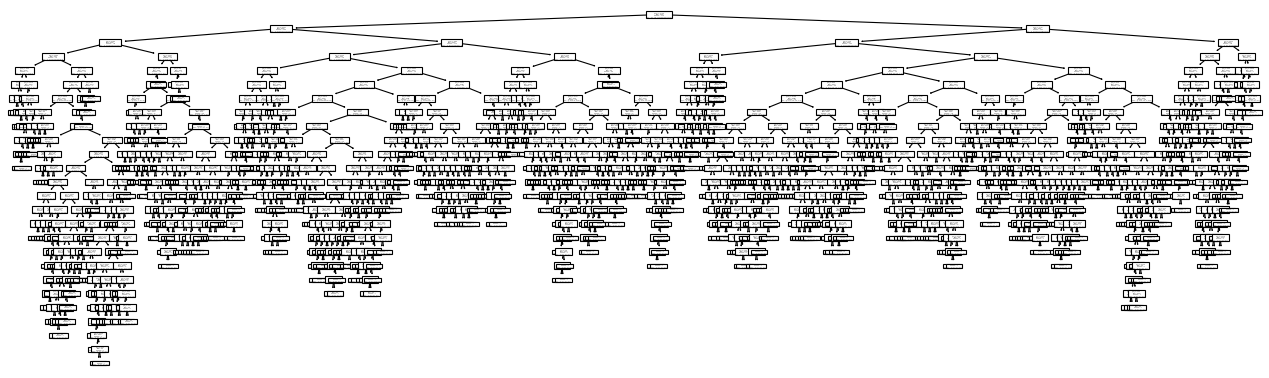

In [12]:
clf = DecisionTreeClassifier(criterion="gini",random_state=100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plot_tree(clf)
plt.savefig('tree.png')
print("y_pred: ", y_pred)
print("y_test: ",np.array(y_test))
print("y_test: ",y_test)


In [13]:
print("10 cross-validation score", np.mean(cross_val_score(clf, x, y, cv=10)))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1: ", f1_score(y_test, y_pred, average='macro'))

c:\users\sajin\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


10 cross-validation score 0.4120028379449939
Accuracy:  0.6171428571428571
Precision:  0.37849011298269175
Recall:  0.37253326485362154
F1:  0.3740905299842025


In [14]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.3,random_state=1)
model=LinearRegression()
model.fit(x2_train,y2_train)
y2_pred=model.predict(x2_test)
r_sq = model.score(x2_train, y2_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('predicted response:', y2_pred, sep='\n')
print("MSE: ", metrics.mean_squared_error(y2_test,y2_pred))

coefficient of determination: 0.28289978661432047
intercept: 134.49433807065316
slope: [ 5.05720124e-02 -1.99701100e+00  2.86986514e-03  7.87685381e-02
 -5.26695620e-01  2.88140351e-03  4.27771477e-05 -1.34394915e+02
  6.26499100e-01  5.76517695e-01  2.20279529e-01]
predicted response:
[5.22901188 5.54653092 6.11293343 ... 5.95521601 5.44988236 6.25912797]
MSE:  0.5385307860052542
